In [ ]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential,model_from_json
from keras.utils.vis_utils import plot_model
from keras.layers import SimpleRNN,Dense,Activation,Conv2D,MaxPool2D,Dropout,Flatten,MaxPooling2D,AveragePooling2D
from tensorflow import optimizers
from tensorflow.keras.optimizers import SGD,Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import BatchNormalization
import csv
import os
from PIL import Image

In [14]:
# 划分训练集，验证集，测试集
database_path = r"C:\Users\fen\Desktop\Graduation project\FER-master\data\fer2013"
datasets_path = r"C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets"
csv_file = os.path.join(database_path, 'fer2013.csv')
train_csv = os.path.join(datasets_path, 'train.csv')
val_csv = os.path.join(datasets_path, 'val.csv')
test_csv = os.path.join(datasets_path, 'test.csv')


with open(csv_file) as f:
    csvr = csv.reader(f)
    header = next(csvr)
    rows = [row for row in csvr]

    trn = [row[:-1] for row in rows if row[-1] == 'Training']
    csv.writer(open(train_csv, 'w+'), lineterminator='\n').writerows([header[:-1]] + trn)
    print(len(trn))

    val = [row[:-1] for row in rows if row[-1] == 'PublicTest']
    csv.writer(open(val_csv, 'w+'), lineterminator='\n').writerows([header[:-1]] + val)
    print(len(val))

    tst = [row[:-1] for row in rows if row[-1] == 'PrivateTest']
    csv.writer(open(test_csv, 'w+'), lineterminator='\n').writerows([header[:-1]] + tst)
    print(len(tst))

28709
3589
3589


In [15]:
#将csv转化成图片
#0_anger，1_disgust，2_fear，3_happy，4_sad，5_surprised，6_normal
datasets_path = r"C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets"
train_csv = os.path.join(datasets_path, 'train.csv')
val_csv = os.path.join(datasets_path, 'val.csv')
test_csv = os.path.join(datasets_path, 'test.csv')

train_set = os.path.join(datasets_path, 'train')
val_set = os.path.join(datasets_path, 'val')
test_set = os.path.join(datasets_path, 'test')

for save_path, csv_file in [(train_set, train_csv), (val_set, val_csv), (test_set, test_csv)]:
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    num = 1
    with open(csv_file) as f:
        csvr = csv.reader(f)
        header = next(csvr)
        for i, (label, pixel) in enumerate(csvr):
            pixel = np.asarray([float(p) for p in pixel.split()]).reshape(48, 48)
            subfolder = os.path.join(save_path, label)
            if not os.path.exists(subfolder):
                os.makedirs(subfolder)
            im = Image.fromarray(pixel).convert('L')
            image_name = os.path.join(subfolder, '{:05d}.jpg'.format(i))
            print(image_name)
            im.save(image_name)

C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\train\0\00000.jpg
C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\train\0\00001.jpg
C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\train\2\00002.jpg
C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\train\4\00003.jpg
C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\train\6\00004.jpg
C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\train\2\00005.jpg
C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\train\4\00006.jpg
C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\train\3\00007.jpg
C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\train\3\00008.jpg
C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\train\2\00009.jpg
C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\train\0\00010.jpg
C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\train\6\00011.jpg
C:\U

In [27]:
#数据增强

datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

dir=r"C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\train\6"
for filename in os.listdir(dir):              #listdir的参数是文件夹的路径
    print(filename)
    img = load_img(dir+'/'+filename)  # 这是一个PIL图像
    x = img_to_array(img)  # 把PIL图像转换成一个numpy数组，形状为(3, 150, 150)
    x = x.reshape((1,) + x.shape)  # 这是一个numpy数组，形状为 (1, 3, 150, 150)
    # 生产图片
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir=r"C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\TrainDataAdd\6",
                              save_prefix='6',
                              save_format='jpeg'):
        i += 1
        if i > 5:
            break  # 否则生成器会退出循环


00004.jpg
00011.jpg
00012.jpg
00013.jpg
00018.jpg
00031.jpg
00035.jpg
00036.jpg
00037.jpg
00044.jpg
00047.jpg
00053.jpg
00060.jpg
00075.jpg
00083.jpg
00092.jpg
00094.jpg
00102.jpg
00112.jpg
00113.jpg
00135.jpg
00136.jpg
00152.jpg
00164.jpg
00168.jpg
00174.jpg
00177.jpg
00198.jpg
00201.jpg
00206.jpg
00217.jpg
00219.jpg
00222.jpg
00226.jpg
00228.jpg
00243.jpg
00246.jpg
00250.jpg
00253.jpg
00261.jpg
00262.jpg
00268.jpg
00272.jpg
00273.jpg
00274.jpg
00286.jpg
00290.jpg
00311.jpg
00320.jpg
00337.jpg
00346.jpg
00347.jpg
00363.jpg
00373.jpg
00376.jpg
00382.jpg
00391.jpg
00395.jpg
00396.jpg
00397.jpg
00399.jpg
00405.jpg
00410.jpg
00415.jpg
00419.jpg
00423.jpg
00442.jpg
00449.jpg
00459.jpg
00461.jpg
00467.jpg
00468.jpg
00482.jpg
00490.jpg
00491.jpg
00493.jpg
00498.jpg
00501.jpg
00502.jpg
00503.jpg
00506.jpg
00508.jpg
00520.jpg
00522.jpg
00535.jpg
00536.jpg
00541.jpg
00542.jpg
00544.jpg
00547.jpg
00551.jpg
00552.jpg
00555.jpg
00557.jpg
00565.jpg
00567.jpg
00570.jpg
00584.jpg
00592.jpg
00596.jpg


Found 57799 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Epoch 1/40
256/256 [==============================] - 324s 1s/step - loss: 2.0452 - accuracy: 0.1848 - val_loss: 1.8633 - val_accuracy: 0.2246
Epoch 2/40
256/256 [==============================] - 297s 1s/step - loss: 1.8979 - accuracy: 0.2063

C:\Users\fen\.conda\envs\fer\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
C:\Users\fen\.conda\envs\fer\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


ValueError: x and y must have same first dimension, but have shapes (40,) and (1,)

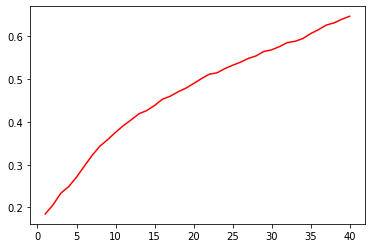

In [1]:
# 模型训练

import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential,model_from_json
from keras.utils.vis_utils import plot_model
from keras.layers import SimpleRNN,Dense,Activation,Conv2D,MaxPool2D,Dropout,Flatten,MaxPooling2D,AveragePooling2D
from tensorflow import optimizers
from tensorflow.keras.optimizers import SGD,Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import BatchNormalization
import csv
import os
from PIL import Image


train_dir=r'C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\TrainDataAdd' #增强后的训练集
val_dir=r'C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\val'
test_dir=r'C:\Users\fen\Desktop\Graduation project\FER-master\data\datasets\test'

train_datagen=ImageDataGenerator()
test_datagen=ImageDataGenerator()

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=128,
    class_mode='categorical'
)
validation_generator=test_datagen.flow_from_directory(
    val_dir,
    target_size=(48,48),
    batch_size=128,
    class_mode='categorical'
)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    batch_size=128,
    class_mode='categorical'
)

#搭建神经网络
#kernel_regularizer=regularizers.l2(0.01),
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 padding='same',input_shape=(48,48,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(128, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(256, kernel_size=(5, 5), strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))

#训练

#train_generator = train_generator.repeat()
#validation_generator = validation_generator.repeat()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizers.RMSprop(lr=0.0001),  #need to train a lot of epochs
              metrics=['accuracy'])

history=model.fit_generator(
    train_generator,
    steps_per_epoch=256,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=32
)



#保存
model.save('my_model.h5')

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.figure("acc")
plt.plot(epochs,acc,'r-',label='Training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('The comparision of train_acc and val_acc')
plt.legend()
plt.show()

plt.figure("loss")
plt.plot(epochs,loss,'r-',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('The comparision of train_loss and val_loss')
plt.legend()
plt.show()